### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [12]:
import pandas as pd 
df = pd.read_csv("prostate.data", sep="\t")
df.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [13]:
df.drop(columns=["Unnamed: 0", "train"], inplace=True)

In [14]:
import matplotlib.pyplot as plt 

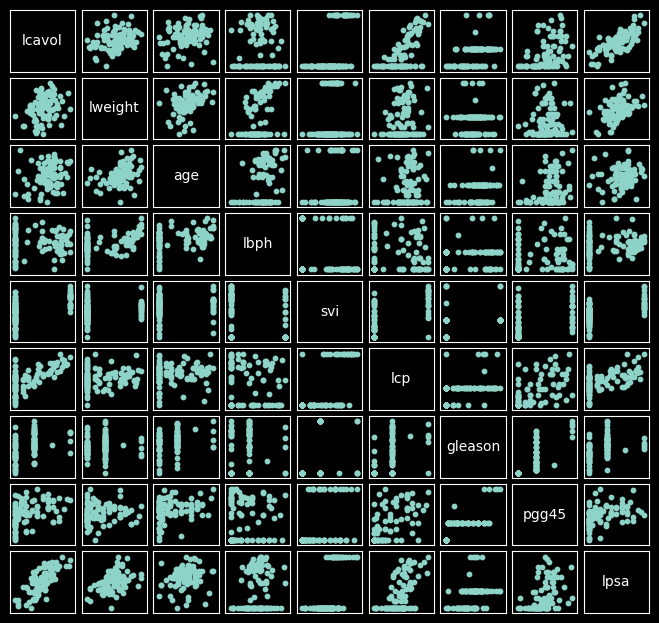

In [15]:
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95
    )
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform = axij.transAxes)
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

In [16]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


According to the scatters, we can tell that lcp and lcavol shows a strong linear relevence. 
According to the shapes of scatters as well as the head info, we can infer the datatype for each predictors as follow:
continuous: lcavol, lweight, lbph, lcp, lpsa
discrete: age, gleason, pgg45
binary: svi, and actually the original train column

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

In [41]:
import numpy as np
size = df.shape[1]
sample_size = df.shape[0]
Average = np.empty((size))
Sum = np.empty((size))
cov_matrix = np.empty((size, size))
for i in range (size):
    col_name = df.columns[i]
    Sum[i] = df[col_name].sum()
    Average[i] = Sum[i]/sample_size
for i in range(size):
    for j in range(size):
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        product_sum = np.sum(col_i * col_j)
        cov_matrix[i, j] = (product_sum - Average[i]*Average[j]*df.shape[0] )/ (df.shape[0] - 1)
data_ = df.values
std = data_.std(axis = 0, ddof = 1)
cor = cov_matrix / std
cor = cor / std.reshape(-1, 1)
print(cor)

[[ 1.          0.28052138  0.22499988  0.0273497   0.538845    0.67531048
   0.43241706  0.43365225  0.73446033]
 [ 0.28052138  1.          0.34796911  0.4422644   0.1553849   0.16453714
   0.05688209  0.10735379  0.43331938]
 [ 0.22499988  0.34796911  1.          0.3501859   0.11765804  0.12766775
   0.2688916   0.27611245  0.16959284]
 [ 0.0273497   0.4422644   0.3501859   1.         -0.08584324 -0.00699943
   0.07782045  0.07846002  0.1798094 ]
 [ 0.538845    0.1553849   0.11765804 -0.08584324  1.          0.67311118
   0.32041222  0.45764762  0.56621822]
 [ 0.67531048  0.16453714  0.12766775 -0.00699943  0.67311118  1.
   0.51483006  0.63152825  0.54881317]
 [ 0.43241706  0.05688209  0.2688916   0.07782045  0.32041222  0.51483006
   1.          0.75190451  0.36898681]
 [ 0.43365225  0.10735379  0.27611245  0.07846002  0.45764762  0.63152825
   0.75190451  1.          0.42231586]
 [ 0.73446033  0.43331938  0.16959284  0.1798094   0.56621822  0.54881317
   0.36898681  0.42231586  1. 

In [38]:
data = df.values
centered_data = data - data.mean(axis = 0)
std_dev = centered_data.std(axis=0, ddof=1)
std_data = centered_data / std_dev
cor_matrix_mat = std_data.T @ std_data / (data.shape[0]-1)
print (cor_matrix_mat)

[[ 1.          0.28052138  0.22499988  0.0273497   0.538845    0.67531048
   0.43241706  0.43365225  0.73446033]
 [ 0.28052138  1.          0.34796911  0.4422644   0.1553849   0.16453714
   0.05688209  0.10735379  0.43331938]
 [ 0.22499988  0.34796911  1.          0.3501859   0.11765804  0.12766775
   0.2688916   0.27611245  0.16959284]
 [ 0.0273497   0.4422644   0.3501859   1.         -0.08584324 -0.00699943
   0.07782045  0.07846002  0.1798094 ]
 [ 0.538845    0.1553849   0.11765804 -0.08584324  1.          0.67311118
   0.32041222  0.45764762  0.56621822]
 [ 0.67531048  0.16453714  0.12766775 -0.00699943  0.67311118  1.
   0.51483006  0.63152825  0.54881317]
 [ 0.43241706  0.05688209  0.2688916   0.07782045  0.32041222  0.51483006
   1.          0.75190451  0.36898681]
 [ 0.43365225  0.10735379  0.27611245  0.07846002  0.45764762  0.63152825
   0.75190451  1.          0.42231586]
 [ 0.73446033  0.43331938  0.16959284  0.1798094   0.56621822  0.54881317
   0.36898681  0.42231586  1. 

In [33]:
corr_matrix_function = df.corr()
print(corr_matrix_function)

           lcavol   lweight       age      lbph       svi       lcp   gleason  \
lcavol   1.000000  0.280521  0.225000  0.027350  0.538845  0.675310  0.432417   
lweight  0.280521  1.000000  0.347969  0.442264  0.155385  0.164537  0.056882   
age      0.225000  0.347969  1.000000  0.350186  0.117658  0.127668  0.268892   
lbph     0.027350  0.442264  0.350186  1.000000 -0.085843 -0.006999  0.077820   
svi      0.538845  0.155385  0.117658 -0.085843  1.000000  0.673111  0.320412   
lcp      0.675310  0.164537  0.127668 -0.006999  0.673111  1.000000  0.514830   
gleason  0.432417  0.056882  0.268892  0.077820  0.320412  0.514830  1.000000   
pgg45    0.433652  0.107354  0.276112  0.078460  0.457648  0.631528  0.751905   
lpsa     0.734460  0.433319  0.169593  0.179809  0.566218  0.548813  0.368987   

            pgg45      lpsa  
lcavol   0.433652  0.734460  
lweight  0.107354  0.433319  
age      0.276112  0.169593  
lbph     0.078460  0.179809  
svi      0.457648  0.566218  
lcp      

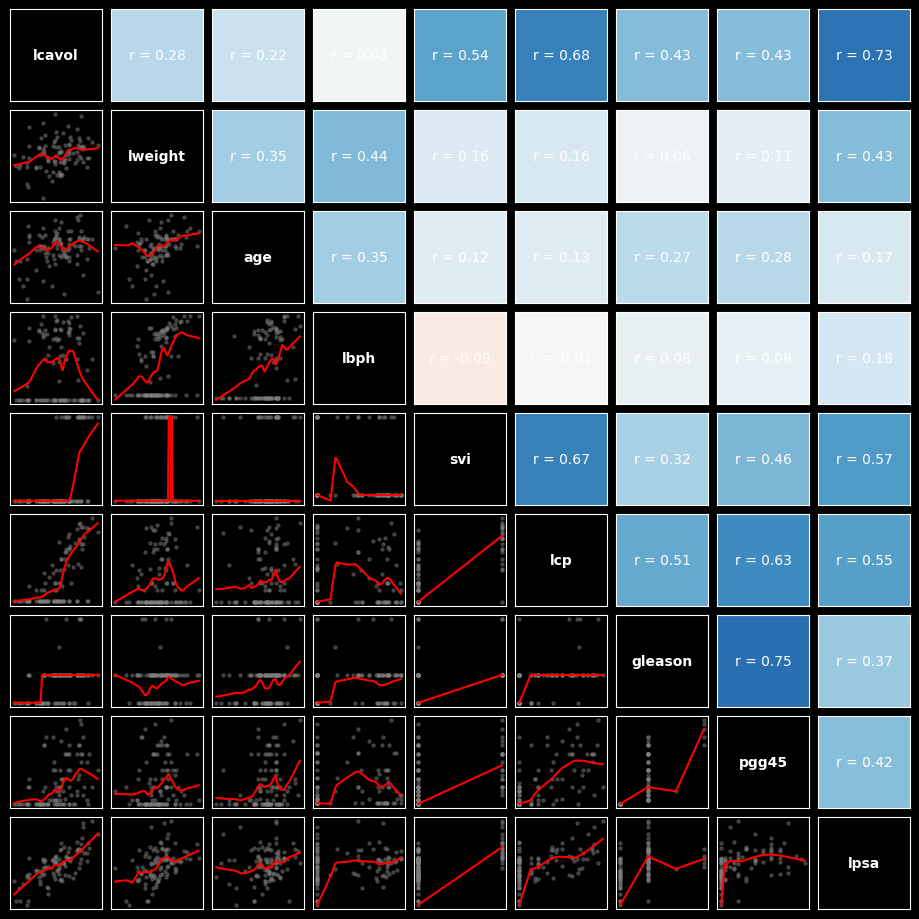

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def pairplot_new(df, corr_matrix, figsize=(10, 10)):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    
    
    plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, bottom=0.05, top=0.95)
    
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i, j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            
            axij.set_xticks([])
            axij.set_yticks([])
            
            if j > i: 
                r = corr_matrix[i, j]
                axij.text(0.5, 0.5, f"r = {r:.2f}", fontsize=10,
                          ha='center', va='center', transform=axij.transAxes)
                
                axij.set_facecolor(plt.cm.RdBu((r + 1) / 2))
                
            elif i == j: 
                axij.text(0.5, 0.5, i_name, fontsize=10, fontweight='bold',
                          ha='center', va='center', transform=axij.transAxes)
                
            else: 
                x = df[j_name].values 
                y = df[i_name].values 
                axij.scatter(x, y, s=5, alpha=0.4, color='gray')
                
                smoothed = lowess(y, x, frac=0.3)
                axij.plot(smoothed[:, 0], smoothed[:, 1], color='red', lw=1.5)

    return fig, ax

fig2, ax2 = pairplot_new(df, corr_matrix_function)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

### General linear regression formula: 

$ Y = X\beta + \epsilon $

Specifically:

$ Y = lvocal, x_1 = lpsa, x_2 = lweight \dots $

In [51]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [52]:
df_enc = pd.get_dummies(df, dtype=np.float64)
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
df_enc['intercept'] = 1
X = df_enc.drop(columns=['lcavol'])
y = df['lcavol']

In [55]:
X.head()

,lweight,age,lbph,lcp,pgg45,lpsa,svi_1,gleason_7,gleason_8,gleason_9,intercept
0,2.769459,50,-1.386294,-1.386294,0,-0.430783,0.0,0.0,0.0,0.0,1
1,3.319626,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0,1
2,2.691243,74,-1.386294,-1.386294,20,-0.162519,0.0,1.0,0.0,0.0,1
3,3.282789,58,-1.386294,-1.386294,0,-0.162519,0.0,0.0,0.0,0.0,1
4,3.432373,62,-1.386294,-1.386294,0,0.371564,0.0,0.0,0.0,0.0,1


1. If 'dtype' is not fixed, pd will make those value of categories bool, which couldn't be used for calculation in matrix. Fixing it in float64 could guarantee its good performance in calculation.
2. The columns produced by onehot encoding svi and gleason are linear relevant, thus the matrix of data is singular, thus not irreversible. 
As we know, 

    $ \hat{\beta} = (X^T X)^{-1}Xy $

    so $(X^T X)^{-1} $ doesn't exist. Thus $\hat{\beta}$ can't be solved. 
3. With the added column, we can calculate the $\beta_0$ with all other parameters, just like:

   $\begin{bmatrix} 1 & X_1 & X_2 & X_3 & \dots \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \beta_3 \\ \dots \end{bmatrix} $

   $ = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \dots= Y $

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [53]:
import statsmodels.api as sm 
model = sm.OLS(y, X)
results = model.fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        12:18:48   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.9

#### Question 1:
After one-hot encoding, we can find the effect of svi_0 and gleason_6 is zipped into $\beta_0$, where we eliminated the linear relativity between each columns while the substantial linear relativity rest in the actual data. Thus the coefficients of svi_1 and gleason_7 gleason_8 gleason_9 could be recoganized as the incremental effect comparing to the baseline, which is svi_0 and gleason_6. 
   
#### Question2:
If we don't do the one-hot encoding, the 1/0 in svi, 6/7/8/9 in gleason will be automatically considered numerical value. Thus the false numerical relation between each value could be established. For example, 9 will be considered as 6 * 1.5, which would assume a simple linear relation between each level of gleason, whereas it's not necessarily true in the real world. For instance, the gleason 7 may mean that it's 10 times severer than 6, whereas 8 is 100 times severer than 7, but limited to the model supposition, the model could only allocate a single linear coefficient to gleason regardless of its own meaning. On the other hand, using one-hot could have each gleason score a reletively linear independent value, preventing the linear hierarchy presupposed. 

What's more, without one-hot encoding the model can only provide us with one coefficient and P-value, which will give no insight except that "Gleason score could affect the result". However with one-hot, we can tell the weight of each score, which may give us insight of the critical score of Gleason which remind the doctor what the real dangerous index would be like.

#### Question3:
Overall, the effect of the regression model is relatively solid, with a R-square 0.686 and a Adj. R-square 0.650(which reflected that there are a few irrelevant variables in it). The P(F-score) is relatively low, which indicates that this model has grasped the relative/causial logic in the data. 

Diving into each items, we can gain some insights. Among all those variables, the effective ones are age, lcp, pgg45, lpsa (p>0.05), where lcp and lpsa contribute the most according to their coefficients. 

Then we go through the residual. In terms of normality, the p of Omnibus is extremely high, indicating that the residual demonstrates a good normality. As to the independence, Durbin-Watson is 2.306, implies no dependence of error between samples. Having the plot below, having the dots equally distributed above and below the baseline, it demonstrates a good homoscedasticity.

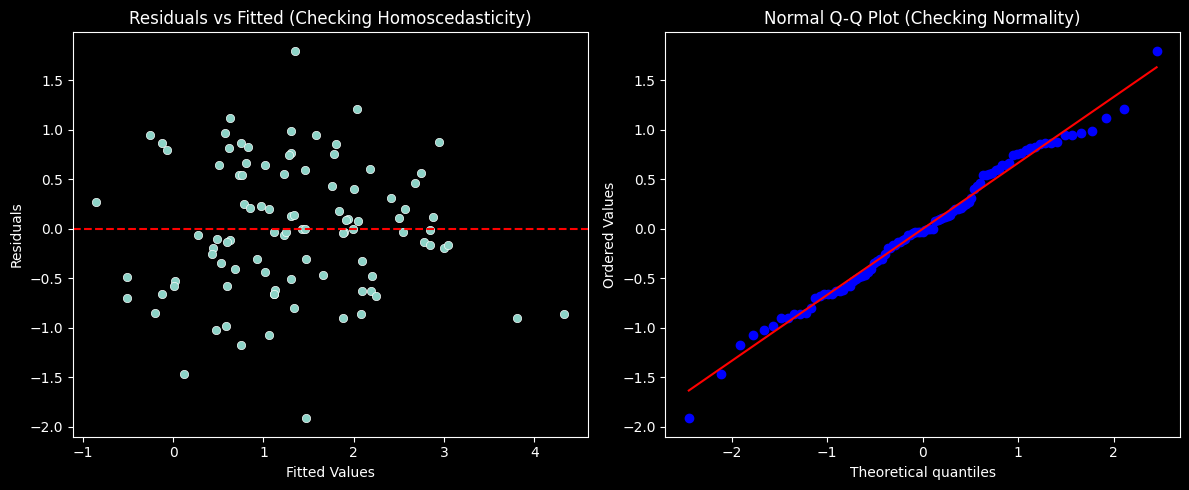

In [60]:
import seaborn as sns
import scipy.stats as stats

fitted_values = results.fittedvalues
residuals = results.resid

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Homoscedasticity)
# Residuals vs Fitted Plot
sns.scatterplot(x=fitted_values, y=residuals, ax=ax[0])
ax[0].axhline(0, color='red', linestyle='--') # y=0
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals vs Fitted (Checking Homoscedasticity)')

# --- Normality ---
# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title('Normal Q-Q Plot (Checking Normality)')

plt.tight_layout()
plt.show()

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [59]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


The confidence intervals of each variable are rather thought-provoking. Starting with lweight, its interval is almost symmetric as well as large, covering 0 in it, which indicates that it might be(which is proved by other index) irrelevant. Furthermore, it's easy to find out that most variables whose intervals covers 0 performs somehow poor in prediction aligning with p-values, thus they are not statistically significant in the model, we cannot confidently say their effect is different from zero.

On the other hand, for those whose interval doesn't cover 0, they all show rather good p-values. Apart from that, the size of interval may show its robostness. Given reasonable current sample size, those whose interval are relatively small, more sample points added may cause no big adjustment of coefficients. 

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [62]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

First of all, the p-value of lpsa is very low, lower than 0.05, so we could say it contributes to the model effectively. What's more, given its confidence interval, we can say for sure that its contribution is positive, which means it is proportional to lcavol. Besides its interval also implies its possible change with added data points. In addition, lpsa has a relatively large standard error as well as coefficient, which strongly indicates its vital role in this case, i.e. it way be one of the most crucial factor of the diagnosis.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [75]:
arr_x = np.array(X)
arr_y = np.array(y)
XTX = arr_x.T @ arr_x
para = np.linalg.inv(XTX) @ arr_x.T @ arr_y
print("parameters:", para)
res = y-arr_x @ para
sigma_sq = res.T @ res / (arr_x.shape[0] - arr_x.shape[1])
C = sigma_sq * np.linalg.inv(XTX)
std_err = np.sqrt(np.diag(C))
t_values = para / std_err
print("Standard Errors:", std_err)
print("t-values:", t_values)
p_values = stats.t.sf(np.abs(t_values), df=arr_x.shape[0] - arr_x.shape[1]) * 2
print("P-values:", p_values)

parameters: [-0.0112462   0.02478241 -0.10419954  0.40275962 -0.00944383  0.5495731
 -0.22041936  0.31167619 -0.71058822  0.79013455 -1.40665404]
Standard Errors: [0.2114525  0.01124109 0.05820854 0.08507355 0.00453973 0.09009325
 0.25635138 0.21526835 0.75882742 0.48751019 0.87445509]
t-values: [-0.05318546  2.20462818 -1.79010738  4.73425167 -2.08026309  6.10004718
 -0.85983297  1.44784956 -0.93642928  1.62075494 -1.60860639]
P-values: [9.57707489e-01 3.01499280e-02 7.69560879e-02 8.57785824e-06
 4.04774068e-02 2.93924065e-08 3.92271694e-01 1.51294991e-01
 3.51674448e-01 1.08731299e-01 1.11367559e-01]


In terms of function `inv`, the problem comes from the float arithmetic. Limited by finite precision, some of the numarical values with narrow margin may be rounded to the same value, which may further cause the matrix be identified falsely as singular, thus produce mistake when calculating inverse. This case is particularly dangerous when the features are highly correlated. What's more, even if the matrix is well-structured, it may cause a huge amount of calculation. In order to calculate a $A^{-1}$, it is necessary to do a full LU decomposition, that is dealing with each columns.

As to the `solve` method, it solve the target by using LU decomposition to deal with one column, and give out the vector, while avoiding the problem caused by singular matrix.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

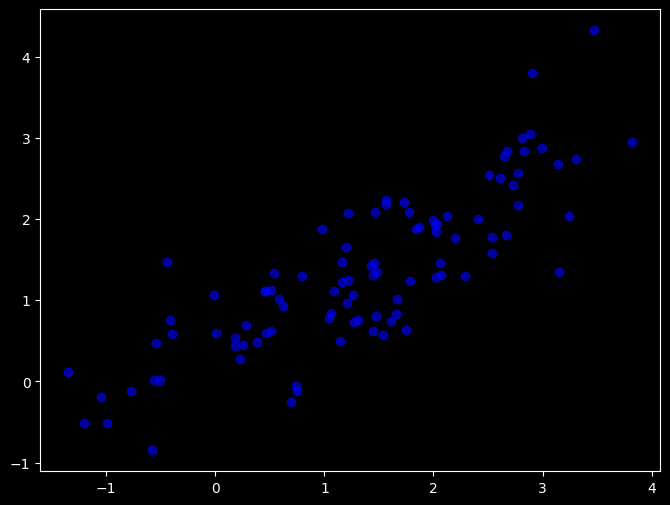

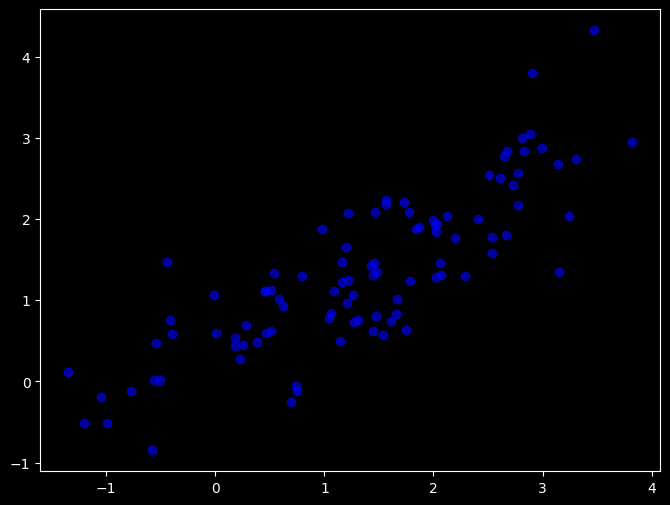

In [84]:
prediction_obj = results.get_prediction(X)
y_pred = prediction_obj.predicted_mean
plt.figure(figsize = (8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predictions')

plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.